In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [139]:
# stock
vti = pd.read_csv('VTI.csv',index_col='Date',parse_dates=True)['Adj Close']
vgk = pd.read_csv('VGK.csv',index_col='Date',parse_dates=True)['Adj Close']
# bond
tlt = pd.read_csv('TLT.csv',index_col='Date',parse_dates=True)['Adj Close']
bwx = pd.read_csv('BWX.csv',index_col='Date',parse_dates=True)['Adj Close']
# mariri
gld = pd.read_csv('GLD.csv',index_col='Date',parse_dates=True)['Adj Close']
vdc = pd.read_csv('VDC.csv',index_col='Date',parse_dates=True)['Adj Close']

stocks = pd.concat([vti,vgk,tlt,bwx,gld,vdc],axis=1)
stocks.columns = ['vti','vgk','tlt','bwx','gld','vdc']

In [140]:
stocks.head()

,vti,vgk,tlt,bwx,gld,vdc
Date,,,,,,
2016-03-21,98.880661,44.206200,118.680367,27.028313,118.959999,125.225983
2016-03-22,98.852165,43.969402,118.652519,27.003759,119.309998,124.350380
2016-03-23,98.045807,43.605125,119.996223,26.890812,116.610001,124.275864
2016-03-24,98.017357,43.304588,120.042557,26.831884,116.330002,124.219986
2016-03-28,98.083763,43.532261,120.200089,26.876081,116.599998,124.695015


In [141]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

vti    0.000538
vgk    0.000338
tlt    0.000065
bwx    0.000057
gld    0.000083
vdc    0.000193
dtype: float64

In [142]:
stocks.pct_change(1).corr()

,vti,vgk,tlt,bwx,gld,vdc
vti,1.000000,0.736453,-0.282442,0.038190,-0.142966,0.632043
vgk,0.736453,1.000000,-0.261687,0.305793,-0.055294,0.456072
tlt,-0.282442,-0.261687,1.000000,0.447311,0.433775,0.005682
bwx,0.038190,0.305793,0.447311,1.000000,0.619451,0.144287
gld,-0.142966,-0.055294,0.433775,0.619451,1.000000,-0.045620
vdc,0.632043,0.456072,0.005682,0.144287,-0.045620,1.000000


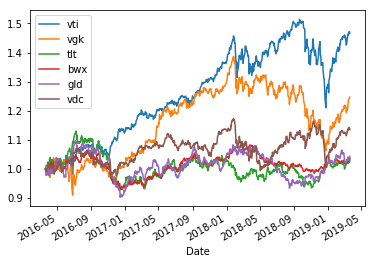

In [143]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot()

In [144]:
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

,vti,vgk,tlt,bwx,gld,vdc
Date,,,,,,
2016-03-21,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-22,-0.000288,-0.005357,-0.000235,-0.000908,0.002942,-0.006992
2016-03-23,-0.008157,-0.008285,0.011325,-0.004183,-0.022630,-0.000599
2016-03-24,-0.000290,-0.006892,0.000386,-0.002191,-0.002401,-0.000450
2016-03-28,0.000677,0.005257,0.001312,0.001647,0.002321,0.003824


In [145]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,vti,vgk,tlt,bwx,gld,vdc
Date,,,,,,
2016-03-21,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-22,-0.000288,-0.005371,-0.000235,-0.000909,0.002938,-0.007017
2016-03-23,-0.008191,-0.008319,0.011261,-0.004191,-0.022890,-0.000599
2016-03-24,-0.000290,-0.006916,0.000386,-0.002194,-0.002404,-0.000450
2016-03-28,0.000677,0.005244,0.001311,0.001646,0.002318,0.003817


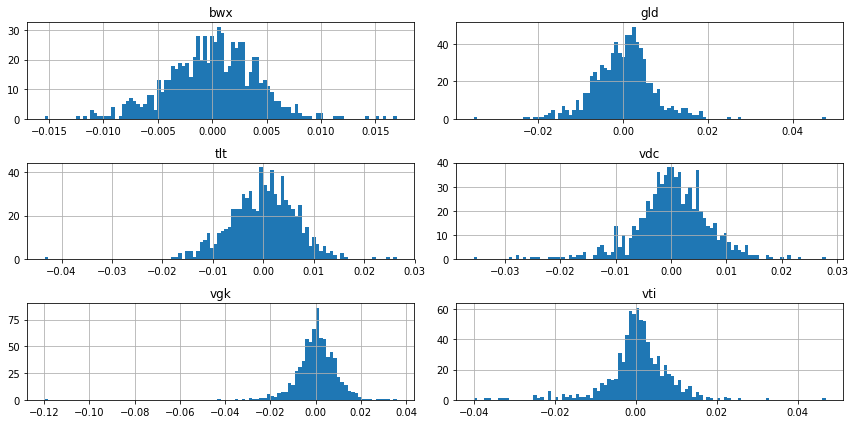

In [146]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [147]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
vti,754.0,0.000507,0.007859,-0.040144,-0.002370,0.000631,0.004348,0.046998
vgk,754.0,0.000293,0.009590,-0.119780,-0.004073,0.000751,0.005329,0.035896
tlt,754.0,0.000044,0.006565,-0.043359,-0.004045,0.000327,0.004257,0.026493
bwx,754.0,0.000049,0.004112,-0.015408,-0.002508,0.000353,0.002629,0.016972
gld,754.0,0.000057,0.007187,-0.035328,-0.004277,0.000479,0.003982,0.047874
vdc,754.0,0.000168,0.007078,-0.035670,-0.003271,0.000316,0.004453,0.027988


In [148]:
log_ret.mean() * 1095

vti    0.555151
vgk    0.320700
tlt    0.048136
bwx    0.053366
gld    0.062367
vdc    0.184092
dtype: float64

In [149]:
log_ret.cov()*1095 # multiply by days

,vti,vgk,tlt,bwx,gld,vdc
vti,0.067634,0.060553,-0.015909,0.001363,-0.008815,0.038516
vgk,0.060553,0.100704,-0.018015,0.013160,-0.004416,0.033743
tlt,-0.015909,-0.018015,0.047193,0.013241,0.022349,0.000362
bwx,0.001363,0.013160,0.013241,0.018516,0.020065,0.004623
gld,-0.008815,-0.004416,0.022349,0.020065,0.056560,-0.002486
vdc,0.038516,0.033743,0.000362,0.004623,-0.002486,0.054862


In [150]:
# Set seed (optional)
np.random.seed(101)

# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(6))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *1095
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 1095, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

Stocks
Index(['vti', 'vgk', 'tlt', 'bwx', 'gld', 'vdc'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166 0.68527698 0.83389686]


Rebalance to sum to 1.0
[0.18401825 0.20335695 0.01014677 0.06112161 0.24419792 0.2971585 ]


Expected Portfolio Return
0.24105900323401283


Expected Volatility
0.16461219000071448


Sharpe Ratio
1.464405541490983


In [151]:
num_ports = 15000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(6))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *1095)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 1095, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [152]:
sharpe_arr.max()

2.218933401544657

In [153]:
sharpe_arr.argmax()

4271

In [172]:
all_weights[4271,:]

array([0.54911793, 0.02407377, 0.19487395, 0.13948026, 0.07474948,
       0.01770461])

In [173]:
max_sr_ret = ret_arr[4271]
max_sr_vol = vol_arr[4271]

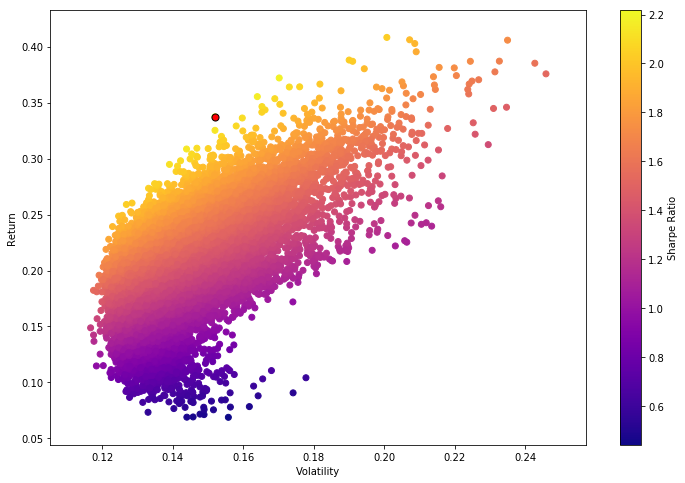

In [174]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

In [157]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 1095
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 1095, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [158]:
from scipy.optimize import minimize

In [159]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [160]:
# Contraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [161]:
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

In [162]:
# 0-1 bounds for each weight
bounds = ((0, 1), (0, 1), (0, 1), (0, 1), (0, 1),(0, 1))

In [163]:
# Initial Guess (equal distribution)
init_guess = [0.16,0.16,0.16,0.16,0.16,0.16]

In [164]:
# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [165]:
opt_results

     fun: -2.3128273820690937
     jac: array([ 4.32431698e-05,  1.00224990e+00, -1.25199556e-04,  1.75221294e-01,
        4.62234020e-05,  1.01455513e+00])
 message: 'Optimization terminated successfully.'
    nfev: 67
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([6.61430659e-01, 4.94938292e-16, 2.58225991e-01, 0.00000000e+00,
       8.03433509e-02, 4.51249775e-16])

In [166]:
opt_results.x

array([6.61430659e-01, 4.94938292e-16, 2.58225991e-01, 0.00000000e+00,
       8.03433509e-02, 4.51249775e-16])

In [167]:
get_ret_vol_sr(opt_results.x)

array([0.38463435, 0.16630482, 2.31282738])

In [168]:
# Our returns go from 0 to somewhere along 0.3
# Create a linspace number of points to calculate x on
frontier_y = np.linspace(0,0.3,100) # Change 100 to a lower number for slower computers!

In [169]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1]

In [170]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

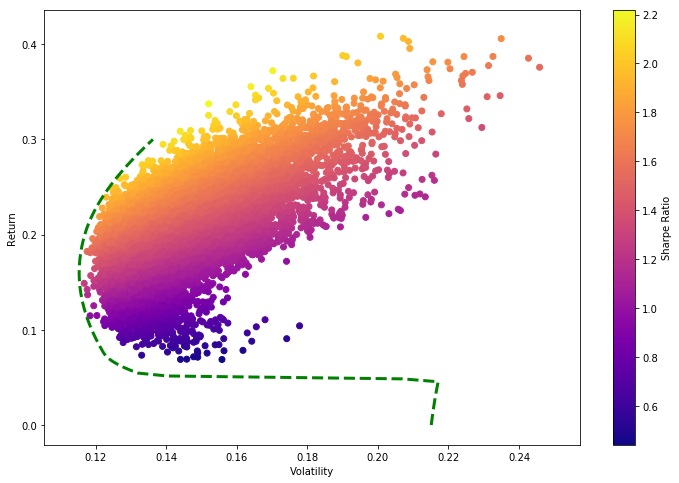

In [171]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)